In [1]:
from kitts import config
from kitts.utils import dataset_utils, data_vision
from kitts.dcl import collect_content, annotate_content
from kitts.core.model import model_builder

In [2]:
# importing the excel file
bdf = dataset_utils.accumulate_dataframe()
bdf = dataset_utils.condition_labels(bdf)
# getting the shape
bdf.shape
#data.columns

Source Path exists: C:\Docs\kitts\data\annotated
Combined 19 files into one dataframe


(3867, 21)

In [3]:
sv = model_builder.SimpleVectorize(bdf)
#CountVectorize feature vectors
#Cvectorizer, Cfeatures = sv.count_vectorize(max_features = 10000)
#TFIDF feature vectors
Tvectorizer, Tfeatures = sv.tfidf_vectorize(max_features = 10000)

Progress: 16

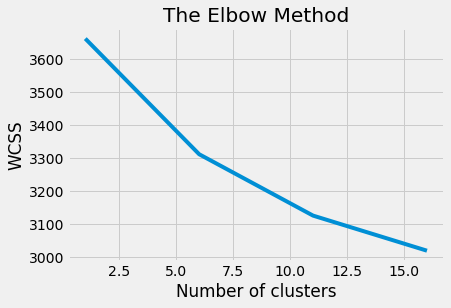

In [4]:
cm = model_builder.ClusterMap(features = Tfeatures)
cm.elbow_plot(20)

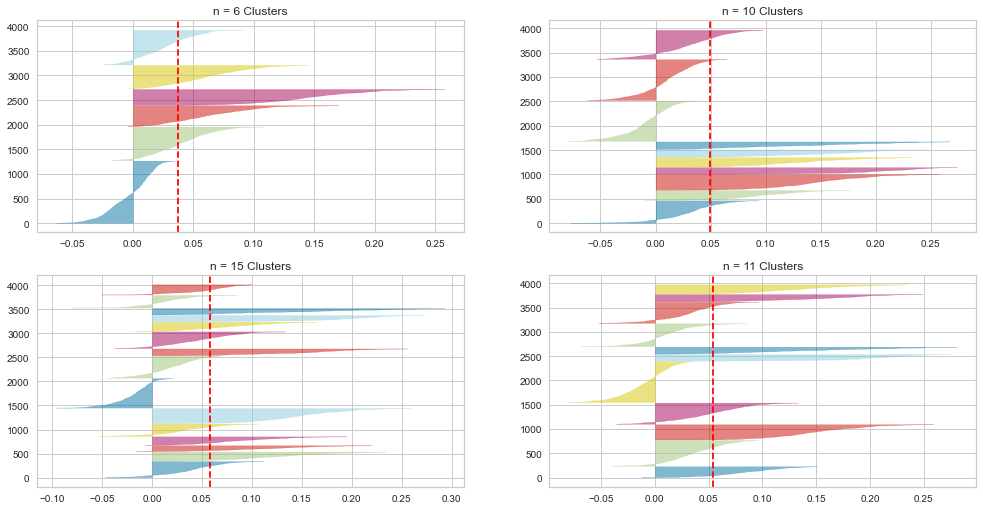

In [5]:
cm.silhouette_plot([6,10,15])

In [6]:
cl = model_builder.kittsCluster(feature_vectors = Tfeatures, feature_names = Tvectorizer.get_feature_names())
cluster, cluster_labels = cl.mbkmeans_clusters(n = 15, batch_size = 50, print_silhouette_val = True)

For n_clusters = 15
Silhouette coefficient: 0.04
Inertia:3142.3633643180888
Silhouette values:
    Cluster 13: Size:25 | Avg:0.23 | Min:0.09 | Max: 0.30
    Cluster 2: Size:15 | Avg:0.22 | Min:0.08 | Max: 0.34
    Cluster 0: Size:143 | Avg:0.17 | Min:0.00 | Max: 0.25
    Cluster 9: Size:102 | Avg:0.12 | Min:0.01 | Max: 0.19
    Cluster 7: Size:85 | Avg:0.12 | Min:0.02 | Max: 0.23
    Cluster 1: Size:302 | Avg:0.11 | Min:-0.03 | Max: 0.21
    Cluster 12: Size:69 | Avg:0.09 | Min:0.01 | Max: 0.19
    Cluster 4: Size:245 | Avg:0.07 | Min:-0.04 | Max: 0.16
    Cluster 5: Size:237 | Avg:0.05 | Min:-0.02 | Max: 0.10
    Cluster 8: Size:283 | Avg:0.04 | Min:-0.10 | Max: 0.14
    Cluster 10: Size:426 | Avg:0.04 | Min:-0.07 | Max: 0.11
    Cluster 11: Size:369 | Avg:0.03 | Min:-0.10 | Max: 0.11
    Cluster 6: Size:471 | Avg:0.02 | Min:-0.07 | Max: 0.08
    Cluster 3: Size:397 | Avg:-0.00 | Min:-0.08 | Max: 0.09
    Cluster 14: Size:698 | Avg:-0.01 | Min:-0.12 | Max: 0.04


In [7]:
cluster_words = cl.display_cluster_words(cluster,words_in_clusters=10)

Printing {words_in_clusters} per cluster (based on centroids):
Cluster 0:
***********************************
['oceanic', 'coastal', 'landforms', 'water', 'resources', 'azure', 'landscape', 'lake', 'cloud', 'sky']
Cluster 1:
***********************************
['ingredient', 'food', 'recipe', 'cuisine', 'dish', 'tableware', 'staple', 'plate', 'produce', 'dishware']
Cluster 2:
***********************************
['sports', 'player', 'ball', 'equipment', 'uniform', 'football', 'soccer', 'jersey', 'shorts', 'product']
Cluster 3:
***********************************
['plant', 'sky', 'landscape', 'natural', 'cloud', 'wheel', 'tree', 'nature', 'tire', 'vehicle']
Cluster 4:
***********************************
['water', 'watercraft', 'boat', 'body', 'azure', 'sky', 'building', 'lake', 'cloud', 'daytime']
Cluster 5:
***********************************
['tints', 'shades', 'symmetry', 'facade', 'building', 'city', 'window', 'wood', 'arch', 'art']
Cluster 6:
***********************************
['fa

Cluster Visualization

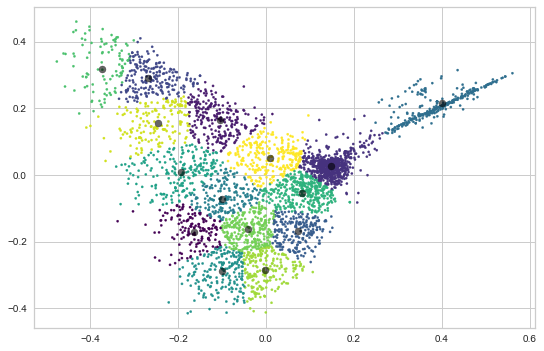

In [8]:
cl.display_cluster_2D(cluster)

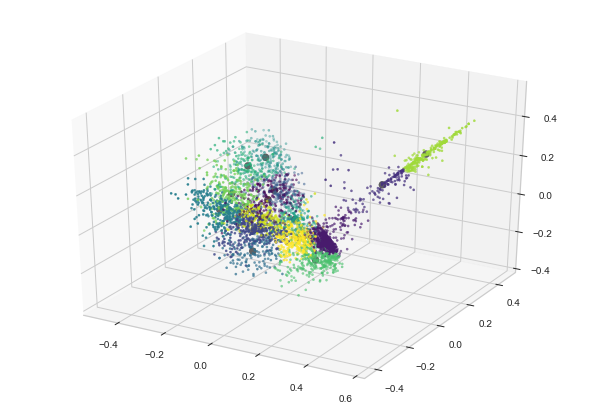

In [9]:
cl.display_cluster_3D(cluster)

Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X)
clustering
clustering.labels_

Another Example